In [22]:
%load_ext sql

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils
import pandas as pd
from locate import *

from scipy import signal 
%matplotlib notebook
%sql sqlite:///schema/test.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


u'Connected: None@schema/test.db'

In [23]:
cur_experiment_id = 29
result = %sql select data from mic where experiment_id = :cur_experiment_id

mic_1 = np.array(result[0][0])
mic_2 = np.array(result[1][0])
mic_3 = np.array(result[2][0])

# Median filter the data
mic_1 = mov_median(mic_1, 51)
mic_2 = mov_median(mic_2, 51)
mic_3 = mov_median(mic_3, 51)

Done.


<IPython.core.display.Javascript object>


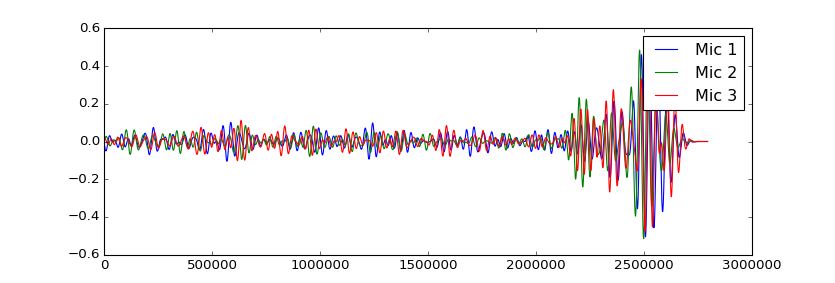

In [28]:


%matplotlib notebook
plt.figure(1)
const = 75
plt.plot(normalize_signal(apply_butter(262-const, 262+const, SAMPLING_FREQ, mic_1)), label='Mic 1', lw=1)#
plt.plot(normalize_signal(apply_butter(262-const, 262+const, SAMPLING_FREQ, mic_2)), label='Mic 2', lw=1)
plt.plot(normalize_signal(apply_butter(262-const, 262+const, SAMPLING_FREQ, mic_3)), label='Mic 3', lw=1)

#plt.plot(mic_1, label='Mic 1 orig', lw=1)
#plt.plot(mic_2, label='Mic 2', lw=1)
#plt.plot(mic_3, label='Mic 3', lw=1)
plt.legend()
plt.show()

In [4]:
sig_butter = normalize_signal(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, mic_1))
peakutils.peak.indexes(sig_butter, thres=0.6, min_dist=1000)

array([  21349,   60159,   99384,  137448,  174304,  209741,  308824,
        347883,  387045,  423801,  458556,  491297,  524084,  558431,
        593695,  682212,  718091,  753951,  790316,  867676,  903692,
        939051,  974307, 1009541, 1044729, 1079753, 1113939, 1172580,
       1207200, 1242673, 1278282, 1313625, 1347720, 1409888, 1444433,
       1479796, 1741716, 1777741, 1814247, 1850477, 1886359, 1922395,
       1959720, 2002009, 2040905, 2077038, 2112288, 2146965, 2181334,
       2215763, 2250430, 2285118, 2318976, 2350246, 2381728, 2416014,
       2451402, 2487129, 2522929])

<IPython.core.display.Javascript object>


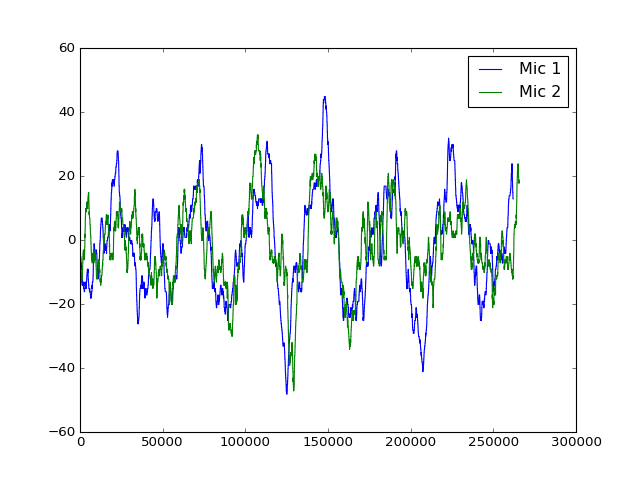

(2489511, 2607474)
offset2 - offset1: -8344

xcorr: -52722

14518.6611811
gcc-phat: 3761



In [27]:
import locate
reload(locate)

sig1 = mic_1
sig2 = mic_2 

n = 5
sig1 = sig1 - np.mean(sig1)
sig2 = sig2 - np.mean(sig2)

# Crop each signal about peaks
sig1_cropped, _ , offset1, pk1_locs = find_peak_window(sig1, thres=0.8, min_dist=1000, n=n)
sig2_cropped, _ , offset2, pk2_locs = find_peak_window(sig2, thres=0.3, min_dist=1000,
                                                           n=None, closest_to=pk1_locs)
%matplotlib notebook
plt.figure(1)
plt.plot(sig1_cropped, label='Mic 1', lw=1)
plt.plot(sig2_cropped, label='Mic 2', lw=1)
plt.legend()
plt.show()

print pk1_locs
print("offset2 - offset1: %d\n" % (offset2 - offset1))
_, delay_xcor = locate.xcorr(sig1_cropped, sig2_cropped)
print "xcorr: %r\n" % (delay_xcor + (offset2 - offset1))
fs = 9.5e6
max_delay = locate.calc_max_delay(0.3)
print max_delay
corr, delay_gcc = locate.gcc_xcorr(apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, sig1_cropped), apply_butter(FREQ_1, FREQ_2, SAMPLING_FREQ, sig2_cropped), max_delay, -(offset2 - offset1), FREQ_1, FREQ_2, fs)
print "gcc-phat: %r\n" % (delay_gcc + (offset2 - offset1))


gcc-phat: -11403



<IPython.core.display.Javascript object>


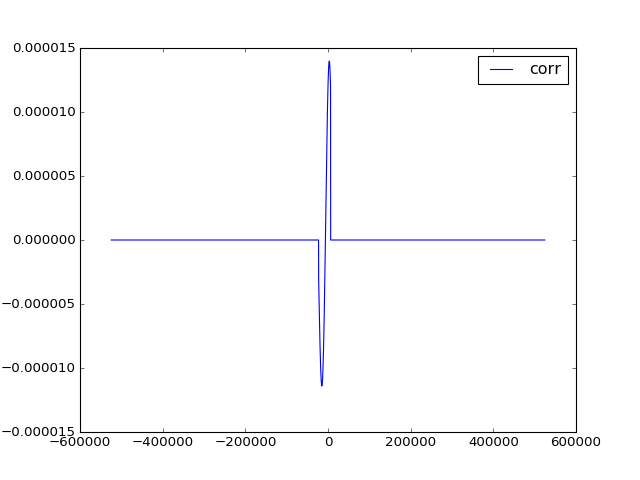

3059
-8344


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [29]:
reload(locate)

corr, delay_gcc = locate.gcc_xcorr(sig1_cropped, sig2_cropped, max_delay, -(offset2 - offset1), FREQ_1, FREQ_2, fs)
print "gcc-phat: %r\n" % (delay_gcc + (offset2 - offset1))

%matplotlib notebook
plt.figure(1)
plt.plot(corr[0], corr[1], label='corr', lw=1)
plt.legend()
plt.show()

print corr[0][np.argmax(corr[1])]
print (offset2 - offset1)